

### 1. PyTorch ve Tensor Nedir?
**PyTorch**, derin öğrenme modelleri geliştirmek için kullanılan açık kaynaklı bir kütüphanedir. **Tensor** ise, PyTorch'ta verileri temsil etmek için kullanılan çok boyutlu bir dizi yapısıdır. Tensor'ler, NumPy dizilerine benzer ancak GPU'da çalışabilme avantajına sahiptirler.

### 2. PyTorch Tensor Oluşturma
PyTorch'ta tensor oluşturmanın birkaç yolu vardır:
```python
import torch

# Direkt olarak bir liste ya da NumPy dizisinden tensor oluşturma
x = torch.tensor([1, 2, 3, 4])

# Sıfırlarla dolu bir tensor oluşturma
zeros = torch.zeros(3, 3)

# Rastgele sayılarla dolu bir tensor oluşturma
rand = torch.rand(2, 2)

# Belirli bir dağılıma sahip tensor oluşturma (normal dağılım)
randn = torch.randn(3, 3)
```

### 3. Tensor'lerin Boyutları ve Şekilleri
Tensor'lerin boyutları (shape), verinin kaç boyutlu olduğunu belirtir.
```python
# Tensor boyutlarını kontrol etme
print(x.shape)   # torch.Size([4])

# Tensor yeniden boyutlandırma
reshaped = x.view(2, 2)
```

### 4. Tensor Matematiksel İşlemler
PyTorch tensörleri üzerinde çeşitli matematiksel işlemler yapabilirsin:
```python
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Toplama
sum = a + b

# Çarpma
product = a * b

# Matris Çarpımı
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
matmul = torch.matmul(matrix_a, matrix_b)

# Eleman bazlı işlemler
c = torch.add(a, b)
```

### 5. GPU Desteği ile Tensor İşlemleri
Tensor'leri GPU'da işlemek için önce tensörleri GPU'ya taşımalısın:
```python
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = x.to(device)
```

### 6. Tensor Özellikleri ve Dönüşümleri
Tensörlerin çeşitli özellikleri ve dönüşümleri vardır:
```python
# Tensor tipi
print(x.dtype)

# Tensor'ü NumPy dizisine dönüştürme
numpy_array = x.cpu().numpy()

# Tensor'ü başka bir tensöre dönüştürme
float_tensor = x.float()
```

### 7. Tensörlerin Otomatik Türev Alma (Autograd)
PyTorch'un en güçlü özelliklerinden biri, tensor'lerin otomatik türev alma yeteneğidir:
```python
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)  # x'in türevi
```

### 8. Tensorlerin Özellikle Derin Öğrenme Uygulamalarındaki Rolü
Tensörler, veriyi modelleme sürecinde kullanılır. Örneğin, giriş verileri, model ağırlıkları ve çıkışlar tensörler olarak temsil edilir. PyTorch’un optimizasyon algoritmaları ve kayıp fonksiyonları, tensörler üzerinde hesaplamalar yapar.

### 9. Tensor İşlemlerinde Performans İyileştirme
- **GPU Kullanımı**: Tensor hesaplamalarını GPU'da yapmak, CPU'ya göre çok daha hızlı sonuçlar verebilir.
- **Yığın İşlemleri (Batching)**: İşlemleri yığınlar halinde (batching) yapmak, performansı artırır.

### 10. İleri Düzey Tensor İşlemleri
- **Broadcasting**: Farklı boyutlara sahip tensorler arasında otomatik olarak boyut uyumlama işlemi.
- **Sıkıştırma ve Genişletme (Squeeze/Unsqueeze)**: Boyutları 1 olan tensörleri sıkıştırma veya yeni boyut ekleme.

```python
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
# Sıkıştırma
squeezed = x.squeeze()
# Genişletme
unsqueezed = x.unsqueeze(0)
```

### 11. Tensor İşlemlerinde Sık Yapılan Hatalar ve Çözümleri
- **Boyut Uyumsuzluğu**: İşlem yapmak istediğin tensorlerin boyutlarının uyumlu olup olmadığını kontrol et.
- **GPU ve CPU Uyuşmazlığı**: Tensor'leri farklı cihazlarda kullanırken, hepsinin aynı cihazda olup olmadığını kontrol et.

Bu kılavuz, PyTorch ile tensor işlemlerini anlaman için temel bir başlangıç noktasıdır. Tensor'ler, derin öğrenme modelleri geliştirmek ve optimize etmek için esnek ve güçlü araçlardır.

In [1]:
import torch

# Tek bir skaler değerli tensor oluşturma ve türevlerinin hesaplanmasını sağlama
x = torch.tensor(2.0, requires_grad=True)

# y = x^2 fonksiyonunu tanımlama
y = x ** 2 + 10

# Geriye doğru türev hesaplama (backward)
y.backward()

# Türev (dy/dx) = 2x, x = 2 için türev 4 olur
print(x.grad)  # Output: tensor(4.)

# İki değişkenli tensorler oluşturma
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

# z = x^2 + y^2 fonksiyonunu tanımlama
z = x**2 + y**2

# Geriye doğru türev hesaplama
z.backward()

# dz/dx = 2x ve dz/dy = 2y
print(x.grad)  # Output: tensor(6.)
print(y.grad)  # Output: tensor(8.)


tensor(4.)
tensor(6.)
tensor(8.)


Bir yapay sinir ağında bilgi aktarımını aşağıdaki gibi ifade etmiştik.
$$
f(x) =  W * x + b
$$

Verilen formülün kod karşılığı aşağıdadır.

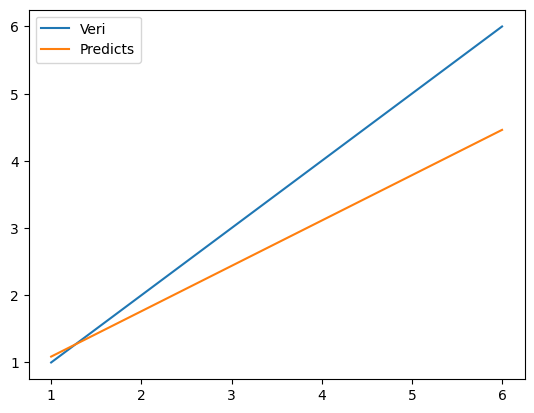

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.W  = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
    def forward(self, X):
        return self.W * X + self.b

veri = torch.tensor([1,2,3,4,5,6],device = 'cpu')
index = torch.tensor([1,2,3,4,5,6], device = 'cpu')

model = MyModel()
predicts = model(veri)
plt.plot(index, veri)
plt.plot(index,predicts.detach().numpy())
plt.legend(["Veri","Predicts"])
plt.show()

In [3]:
print(f"Modelin tahminleri :\n{model(veri)}")

print(f"Gerçek veri :\n{veri}")

Modelin tahminleri :
tensor([1.0874, 1.7622, 2.4370, 3.1118, 3.7866, 4.4614],
       grad_fn=<AddBackward0>)
Gerçek veri :
tensor([1, 2, 3, 4, 5, 6])


tensor([2.8309, 2.0321, 3.4550, 2.7473, 2.2233, 3.5598],
       grad_fn=<AddBackward0>)


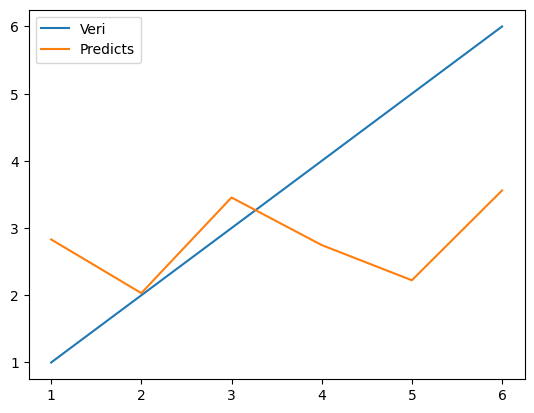

In [43]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        #self.fc1 = nn.Linear(6,1)
        self.W = nn.Parameter(torch.rand(2,6))
        self.b = nn.Parameter(torch.rand(2,6))
       
      
        
    def forward(self, X):
        return self.W[0] * X[0] + self.b[0] + self.W[1] * X[1] + self.b[1]

veri = torch.tensor([1,2,3,4,5,6],device = 'cpu')

index = torch.tensor([1,2,3,4,5,6], device = 'cpu')

inputs = torch.tensor([[1,2,3,4,5,6],
                       [1,2,3,4,5,6]], device = 'cpu')

model = MyModel()
predicts = model(inputs)
model = MyModel()
predicts = model(veri)
print(predicts)
plt.plot(index, veri)
plt.plot(index,predicts.detach().numpy())
plt.legend(["Veri","Predicts"])
plt.show()


In [5]:
print(f"Modelin tahminleri :\n{model(veri)}")

print(f"Gerçek veri :\n{veri}")

Modelin tahminleri :
tensor([1.0742, 1.4296, 1.7849, 2.1403, 2.4957, 2.8510],
       grad_fn=<AddBackward0>)
Gerçek veri :
tensor([1, 2, 3, 4, 5, 6])


In [98]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 3)
       
        
    def forward(self, X1):
        out = self.fc1(X1)
        return out[0] + out[1]

# Veri ve index tensorleri
veri = torch.tensor([1, 2, 3, 4, 5, 6], device='cpu', dtype=torch.float32)
index = torch.tensor([1, 2, 3, 4, 5, 6], device='cpu')

# Girdi tensorü
inputs = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                       [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]], device='cpu')

print(inputs.shape)
model = MyModel()

# İlk tahmin


# Optimizasyon ve kayıp fonksiyonları
optimizer_alg = torch.optim.Adam(model.parameters(), lr=0.002)
loss_func = nn.MSELoss()

batch_size = 3
total_epochs = 20

X = inputs
Y = veri

for e in range(total_epochs):
    for i in range(0, 6, batch_size):
        # Batch'leri seçme
        X_batch_1 = X[:,i:i+batch_size]       
        Y_batch = Y[i:i+batch_size]

        print(i,X_batch_1)
        # Tahmin
        Y_pred = model(X_batch_1)
        
        # Kayıp hesaplama
        loss_s = loss_func(Y_pred, Y_batch)
        
        # Backward ve optimizasyon
        optimizer_alg.zero_grad()
        loss_s.backward()
        optimizer_alg.step()
    
    print(f'Gerçekleşen epoch {e}, En son loss değeri {loss_s.item()}')

# Son tahmin ve doğruluk hesaplama
#with torch.no_grad():
#    Y_pred = model(inputs)




torch.Size([2, 6])
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 0, En son loss değeri 19.762332916259766
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 1, En son loss değeri 18.943159103393555
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 2, En son loss değeri 18.131505966186523
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 3, En son loss değeri 17.336999893188477
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 4, En son loss değeri 16.563264846801758
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5., 6.],
        [4., 5., 6.]])
Gerçekleşen epoch 5, En son loss değeri 15.812149047851562
0 tensor([[1., 2., 3.],
        [1., 2., 3.]])
3 tensor([[4., 5

In [71]:
X[:]

tensor([[1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.]])

$$
f(x) = \sum_{i=1}^n W_i * x_i + b_i
$$
